In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv
/kaggle/input/digit-recognizer/sample_submission.csv


In [2]:
# define the directory where the data is
DATA_DIR = "/kaggle/input/digit-recognizer/"

In [3]:
# load the training samples
train = pd.read_csv(DATA_DIR + "train.csv")

# print out the head of the training sampes
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# load the testing samples
test = pd.read_csv(DATA_DIR + "test.csv")

test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# prepare the training data into correct format

'''
Take all rows, and all columns (except the first column) to format the training data.
Transform the values into float values
'''
X_train = train.iloc[:, 1:].values
X_train = X_train.astype('float32')
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [6]:
# prepare the labels for the training set
y_train = train.iloc[:, 0].values.astype('int32')
y_train

array([1, 0, 1, ..., 7, 6, 9], dtype=int32)

In [7]:
X_test = test.values.astype('float32')
X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### Data Visualization

In [8]:
X_train.shape

(42000, 784)

In [9]:
# convert the training dataset to (# imgs, row_pixels, col_pixels)
X_train = X_train.reshape(X_train.shape[0], 28, 28)
X_train
print(X_train.shape)

(42000, 28, 28)


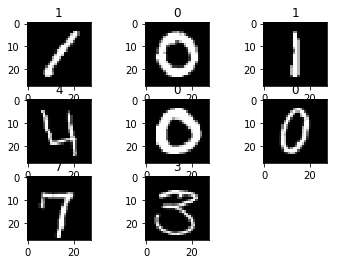

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

for i in range(1, 9):
    # 3 x 3 plots : 3 3 0+i
    plt.subplot(330 + i)
    plt.imshow(X_train[i-1], cmap=plt.get_cmap('gray'))
    plt.title(y_train[i-1])

In [11]:
# expand 1 more dimension for the grey colour channel
# axis=3 :: expand into 4th dimension
X_train = np.expand_dims(X_train, axis=3)
X_train.shape

(42000, 28, 28, 1)

In [12]:
# same with X_test
X_test = X_test.reshape(X_test.shape[0], 28, 28)
X_test = np.expand_dims(X_test, axis=3)
X_test.shape

(28000, 28, 28, 1)

### feature standardization (centering data around 0 mean, unit variance)

In [13]:
# mean
mean_px = X_train.mean().astype(np.float32)
print(mean_px)

# std: standard deviation
std_px = X_train.std().astype(np.float32)
print(std_px)

def standardize(x):
    return (x-mean_px)/std_px

33.408936
78.67759


### One Hot encoding of labels

In [14]:
# one hot encoding is 0 in all dimensions except 1
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train)
print(y_train.shape)
num_classes = y_train.shape[1]
print(num_classes)

Using TensorFlow backend.


(42000, 10)
10


/opt/conda/lib/python3.6/site-packages/matplotlib/text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


([<matplotlib.axis.XTick at 0x7fe2a147b7b8>,
 <a list of 10 Text xticklabel objects>)

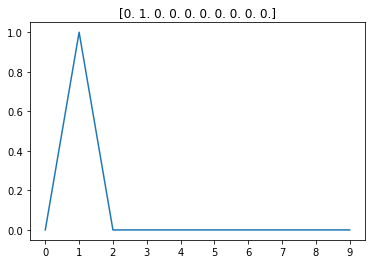

In [15]:
plt.title(y_train[0])
plt.plot(y_train[0])
plt.xticks(range(10))

### Designing the neural network architecture

In [16]:
from keras.models import Sequential
from keras.layers import Dense, Lambda, Flatten
from keras.optimizers import Adam

# create a sequential model
model = Sequential()

# standardize and flatten the 28 x 28 input
# element-wise standardization
model.add(Lambda(standardize, input_shape=(28,28,1)))
model.add(Flatten())

# hidden layers with ReLU activation
model.add(Dense(16, input_shape=(784,), activation='relu'))
model.add(Dense(16, input_shape=(16,), activation='relu'))

# output layer with Softmax activation
model.add(Dense(10, input_shape=(16,), activation='softmax'))

In [17]:
# define the optimizer for the model
adamOptimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)

model.compile(optimizer=adamOptimizer, loss='categorical_crossentropy', metrics=['accuracy'])

print('inputs: ', model.inputs)
print('outputs: ', model.outputs)
print('layers: ', model.layers)
print('summary: ', model.summary())

inputs:  [<tf.Tensor 'lambda_1_input:0' shape=(None, 28, 28, 1) dtype=float32>]
outputs:  [<tf.Tensor 'dense_3/Softmax:0' shape=(None, 10) dtype=float32>]
layers:  [<keras.layers.core.Lambda object at 0x7fe2e40ca9b0>, <keras.layers.core.Flatten object at 0x7fe2a13863c8>, <keras.layers.core.Dense object at 0x7fe2a1386c18>, <keras.layers.core.Dense object at 0x7fe2a13865c0>, <keras.layers.core.Dense object at 0x7fe2a13b4978>]
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (None, 28, 28, 1)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                12560     
_________________________________________________________________
dense_2 (Dense)       

### Cross Validation

In [18]:
from sklearn.model_selection import train_test_split
X = X_train
y = y_train

# split the train and validation set in the ratio 4:1
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [19]:
from keras.preprocessing import image

# use the image data generator to construct the generator
gen = image.ImageDataGenerator()

In [20]:
BATCH_SIZE = 64

# create train, validation data generators so that we don't have to load every training sample
# into the memory at once (which would be very memory extensive)
print(X_train.shape)
train_batches = gen.flow(X_train, y_train, batch_size=BATCH_SIZE)
val_batches = gen.flow(X_val, y_val, batch_size=BATCH_SIZE)
print(train_batches)
print(train_batches.n)

(33600, 28, 28, 1)
33600


In [21]:
from keras.callbacks import EarlyStopping

earlyStopping = EarlyStopping(monitor='accuracy', patience=8, min_delta=0.01)

# start training the model
history = model.fit_generator(
    generator=train_batches,
    steps_per_epoch=len(X_train)/BATCH_SIZE,
    epochs=20,
    validation_data=val_batches,
    validation_steps=len(X_val)/BATCH_SIZE,
    callbacks=[earlyStopping]
)

Epoch 1/20
525/525 [==============================] - 3s 5ms/step - loss: 0.7040 - accuracy: 0.7850 - val_loss: 0.4347 - val_accuracy: 0.8996
Epoch 2/20
525/525 [==============================] - 2s 5ms/step - loss: 0.2867 - accuracy: 0.9160 - val_loss: 0.5702 - val_accuracy: 0.9212
Epoch 3/20
525/525 [==============================] - 2s 5ms/step - loss: 0.2358 - accuracy: 0.9289 - val_loss: 0.0781 - val_accuracy: 0.9268
Epoch 4/20
525/525 [==============================] - 2s 5ms/step - loss: 0.2052 - accuracy: 0.9382 - val_loss: 0.3324 - val_accuracy: 0.9210
Epoch 5/20
525/525 [==============================] - 3s 5ms/step - loss: 0.1863 - accuracy: 0.9436 - val_loss: 0.0092 - val_accuracy: 0.9335
Epoch 6/20
525/525 [==============================] - 2s 5ms/step - loss: 0.1719 - accuracy: 0.9478 - val_loss: 0.4164 - val_accuracy: 0.9352
Epoch 7/20
525/525 [==============================] - 2s 5ms/step - loss: 0.1585 - accuracy: 0.9510 - val_loss: 0.2778 - val_accuracy: 0.9352
Epoch 

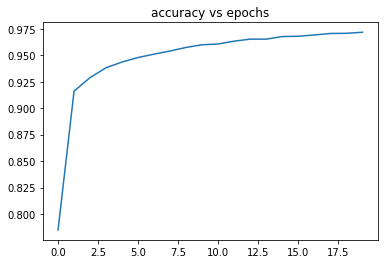

In [22]:
plt.title('accuracy vs epochs')
plt.plot(history.history['accuracy'])
plt.show()

### Prediction

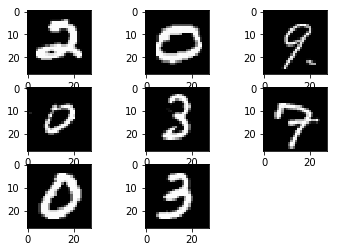

In [23]:
X_test_for_display = X_test.reshape(X_test.shape[0], 28, 28)

for i in range(1, 9):
    # 3 x 3 plots : 3 3 0+i
    plt.subplot(330 + i)
    plt.imshow(X_test_for_display[i-1], cmap=plt.get_cmap('gray'))

In [24]:
# predict: returns the scores of the regression
# predict_class: returns the class of the prediction
predictions = model.predict_classes(X_test, verbose=0)
print(predictions)

[2 0 9 ... 3 9 2]


In [25]:
# create a submissions pandas dataframe 
submissions = pd.DataFrame({
    "ImageId": list(range(1, len(predictions)+1)),
    "Label": predictions
})

# create a csv from the submissions dataframe
submissions.to_csv("VanillaNN.csv", index=False, header=True)